In [1]:
%load_ext autoreload
%autoreload 2
from dotenv import load_dotenv
load_dotenv('../.env', override=True)
import pathlib

import jax
print(jax.devices())
from CEL.utils.config_reader import config_summoner
from CEL.utils.args import args_parser
import torch
from CEL.data.data_manager import load_dataset, load_dataloader
from CEL.networks.model_manager import load_model
from CEL.experiments.exp_manager import load_experiment
from CEL.utils.register import register
from dataclasses import dataclass
from jsonargparse import set_docstring_parse_options
import jsonargparse
from jsonargparse import ArgumentParser, ActionConfigFile
from CEL.experiments.soft_intervention_exp import ExpClass
from CEL.data.data_manager import MyDataset
from CEL.definitions import ROOT_DIR
from argparse import ArgumentParser as origArgumentParser
import yaml
import wandb
from typing import List
from hashlib import sha1
import os
from einops import rearrange

# import subprocess
# print(subprocess.check_output(['which', 'ptxas']))

def to_bool(value):
    if isinstance(value, bool):
        return value
    if isinstance(value, str):
        return value.lower() in ('true', '1', 't', 'yes', 'y')
    raise ValueError("Input must be a string or a boolean")


class CEL:
    def __init__(self, exp: ExpClass, name: str = None, tags: List[str] = None):
        self.exp = exp
        self.name = name
        self.tags = tags

def dump_config(cfg):
    yaml.add_representer(pathlib.Path, lambda dumper, data: dumper.represent_scalar('tag:yaml.org,2002:str', str(data)))
    yaml.add_representer(pathlib.PosixPath,
                         lambda dumper, data: dumper.represent_scalar('tag:yaml.org,2002:str', str(data)))
    yaml.add_representer(jsonargparse._util.Path,
                         lambda dumper, data: dumper.represent_scalar('tag:yaml.org,2002:str', str(data)))
    return yaml.dump(cfg.as_dict(), sort_keys=True)

[cuda(id=0)]


Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getDampedPendulumDataset/DampedPendulumDataset_1c146815ecd4093bf896992759f2d368dce6e67d.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getDampedPendulumDataset/DampedPendulumDataset_e0591101725f6dd223990a7d23f7088c95119517.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getDampedPendulumDataset/DampedPendulumDataset_79c17463af5539d2748d6b9b39992fae46abf37f.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getDampedPendulumDataset/DampedPendulumDataset_f9a4d3ea4109b09461ea0970fc16bff052a4acd6.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getDampedPendulumDataset/DampedPendulumDataset_45267f56bf3909275f72b71cfdb3b6c58b567171.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getDampedPendulumDataset/DampedPendulumDataset_ec405976a5841a25ca90d029f245ca0a092725ab.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets

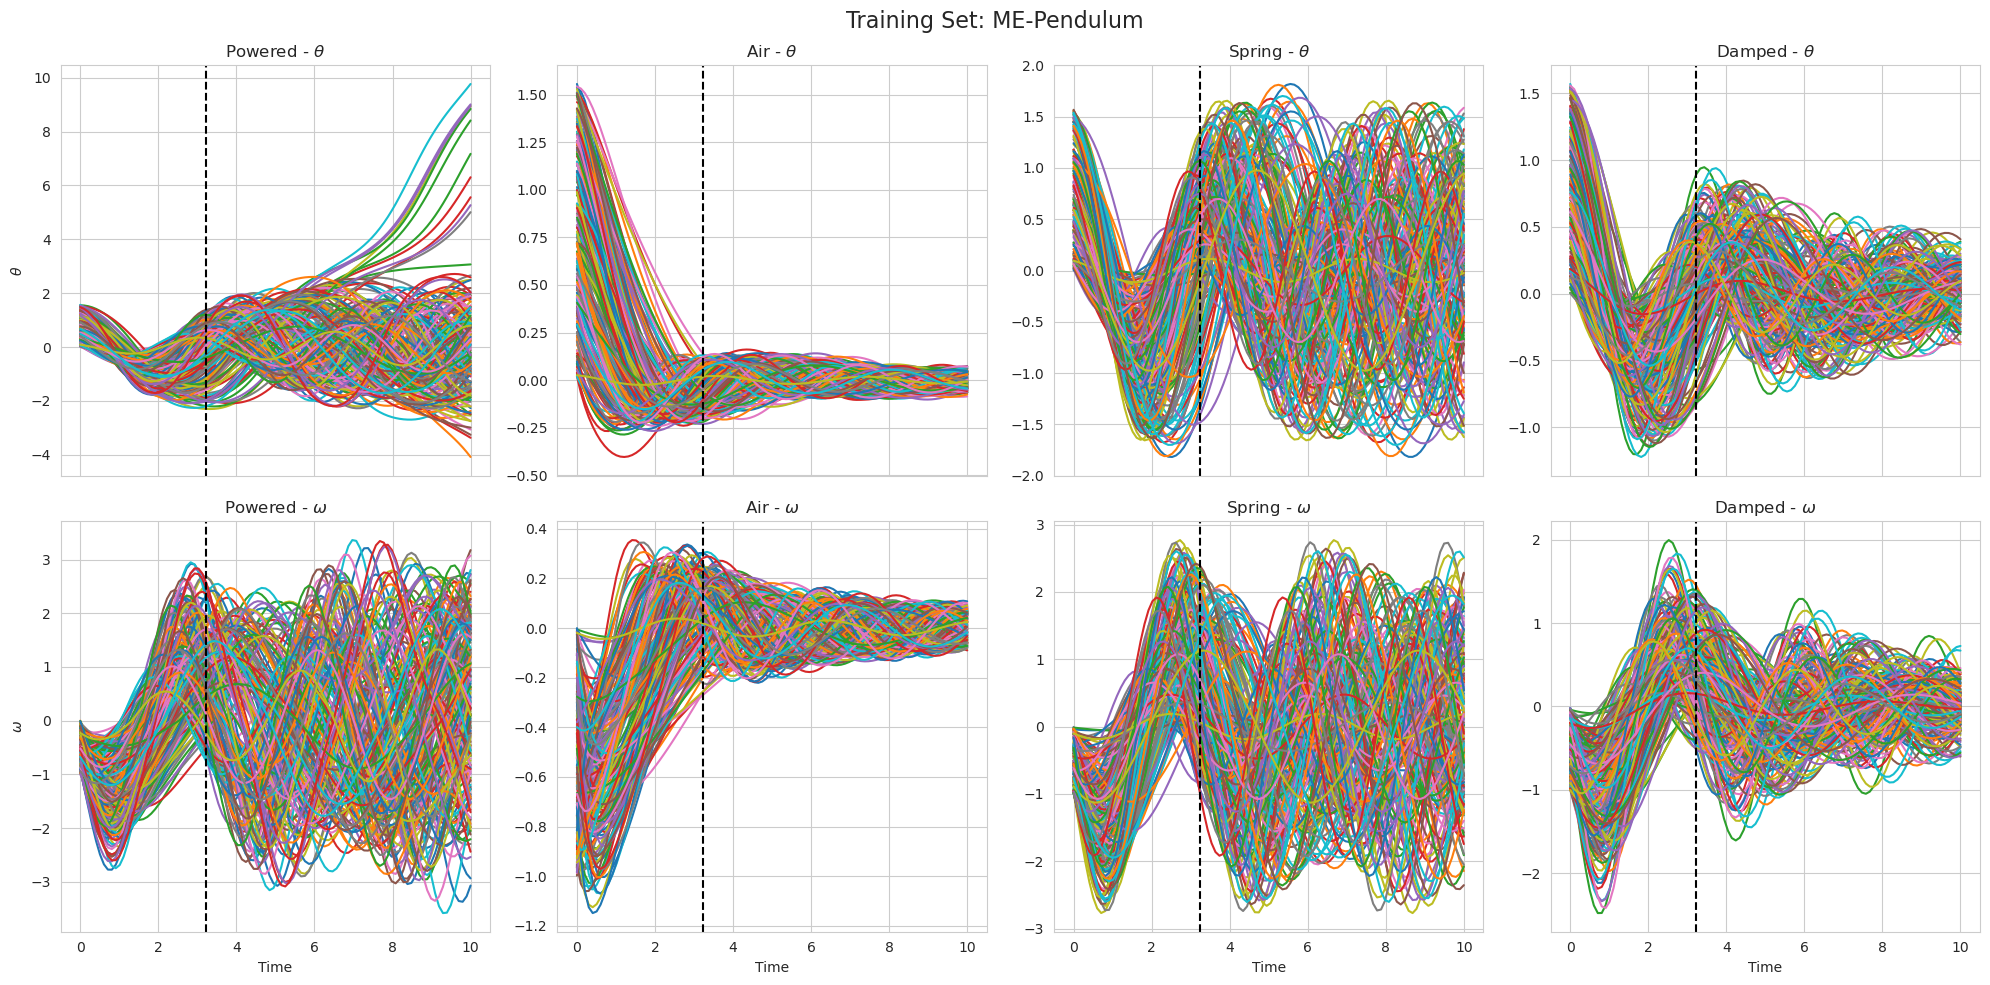

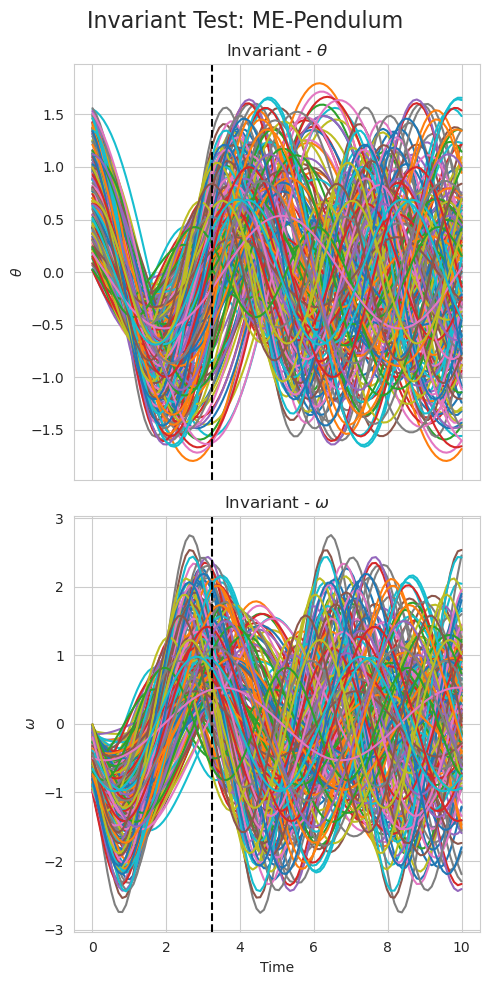

Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getLotkaVolterra2Dataset/LotkaVolterra2Dataset_5dcc7ce162894b10e26b1efebc2b46be9ed51bc5.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getLotkaVolterra2Dataset/LotkaVolterra2Dataset_53a8c26e879def2e603b5b42e6d275611b2412c9.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getLotkaVolterra2Dataset/LotkaVolterra2Dataset_7f12ba1f98abe401bbe80b49a6f8fa1ee9f02942.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getLotkaVolterra2Dataset/LotkaVolterra2Dataset_223b3382e64ff8a5b692721e6fee01d1b0dd9385.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getLotkaVolterra2Dataset/LotkaVolterra2Dataset_aedb3f5c49aba2458e2ce5c1b0964cac189ec2ec.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getLotkaVolterra2Dataset/LotkaVolterra2Dataset_8baa317b23ce958ba5b6677ddcfcf573d616f368.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets

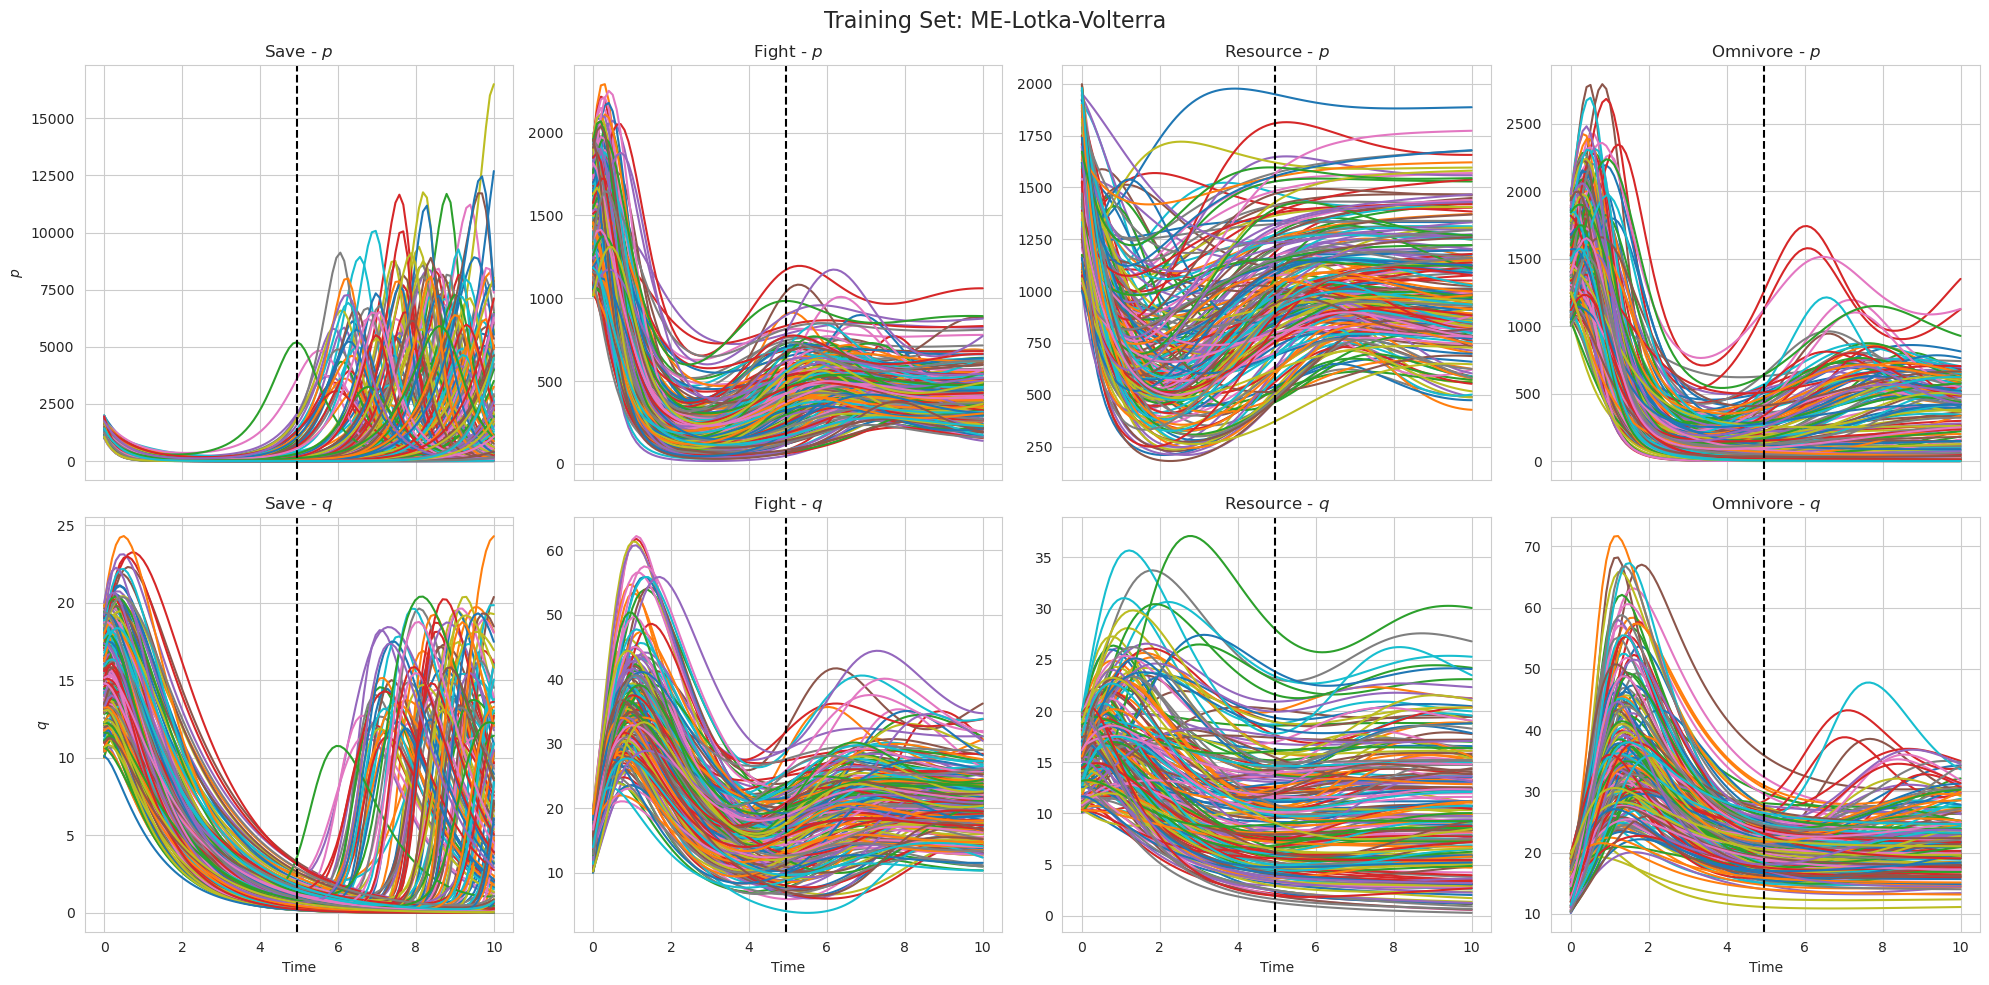

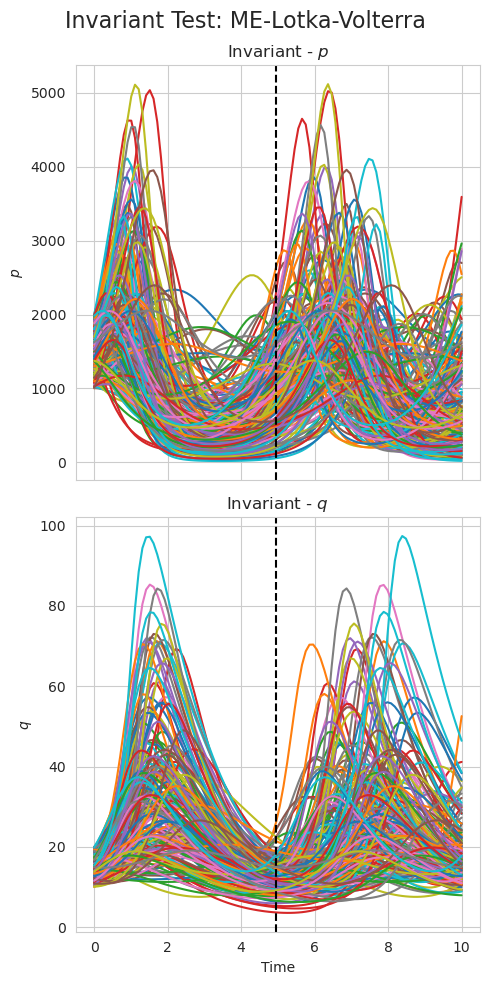

Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getSIREpidemicDataset/SIREpidemicDataset_44a18771d254719e8658f1b3cb91639e4342c423.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getSIREpidemicDataset/SIREpidemicDataset_0e45c8d8584e37f91e48702d9b6a2ae9481d5f18.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getSIREpidemicDataset/SIREpidemicDataset_c9d43fcdc0602f098467d432116666287a3f0a3f.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getSIREpidemicDataset/SIREpidemicDataset_0fc5d78540c83066abdd9730da3f0522fdf939c7.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getSIREpidemicDataset/SIREpidemicDataset_1f5eec04f66ef2949c6701a5ed98e1db864f0120.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getSIREpidemicDataset/SIREpidemicDataset_026565ff7e961ac011bd42d246737bb797f6818c.pt
Using saved file: /data/shurui.gui/Projects/CEL/storage/datasets/getSIREpidemicDataset/SIREpidemicDa

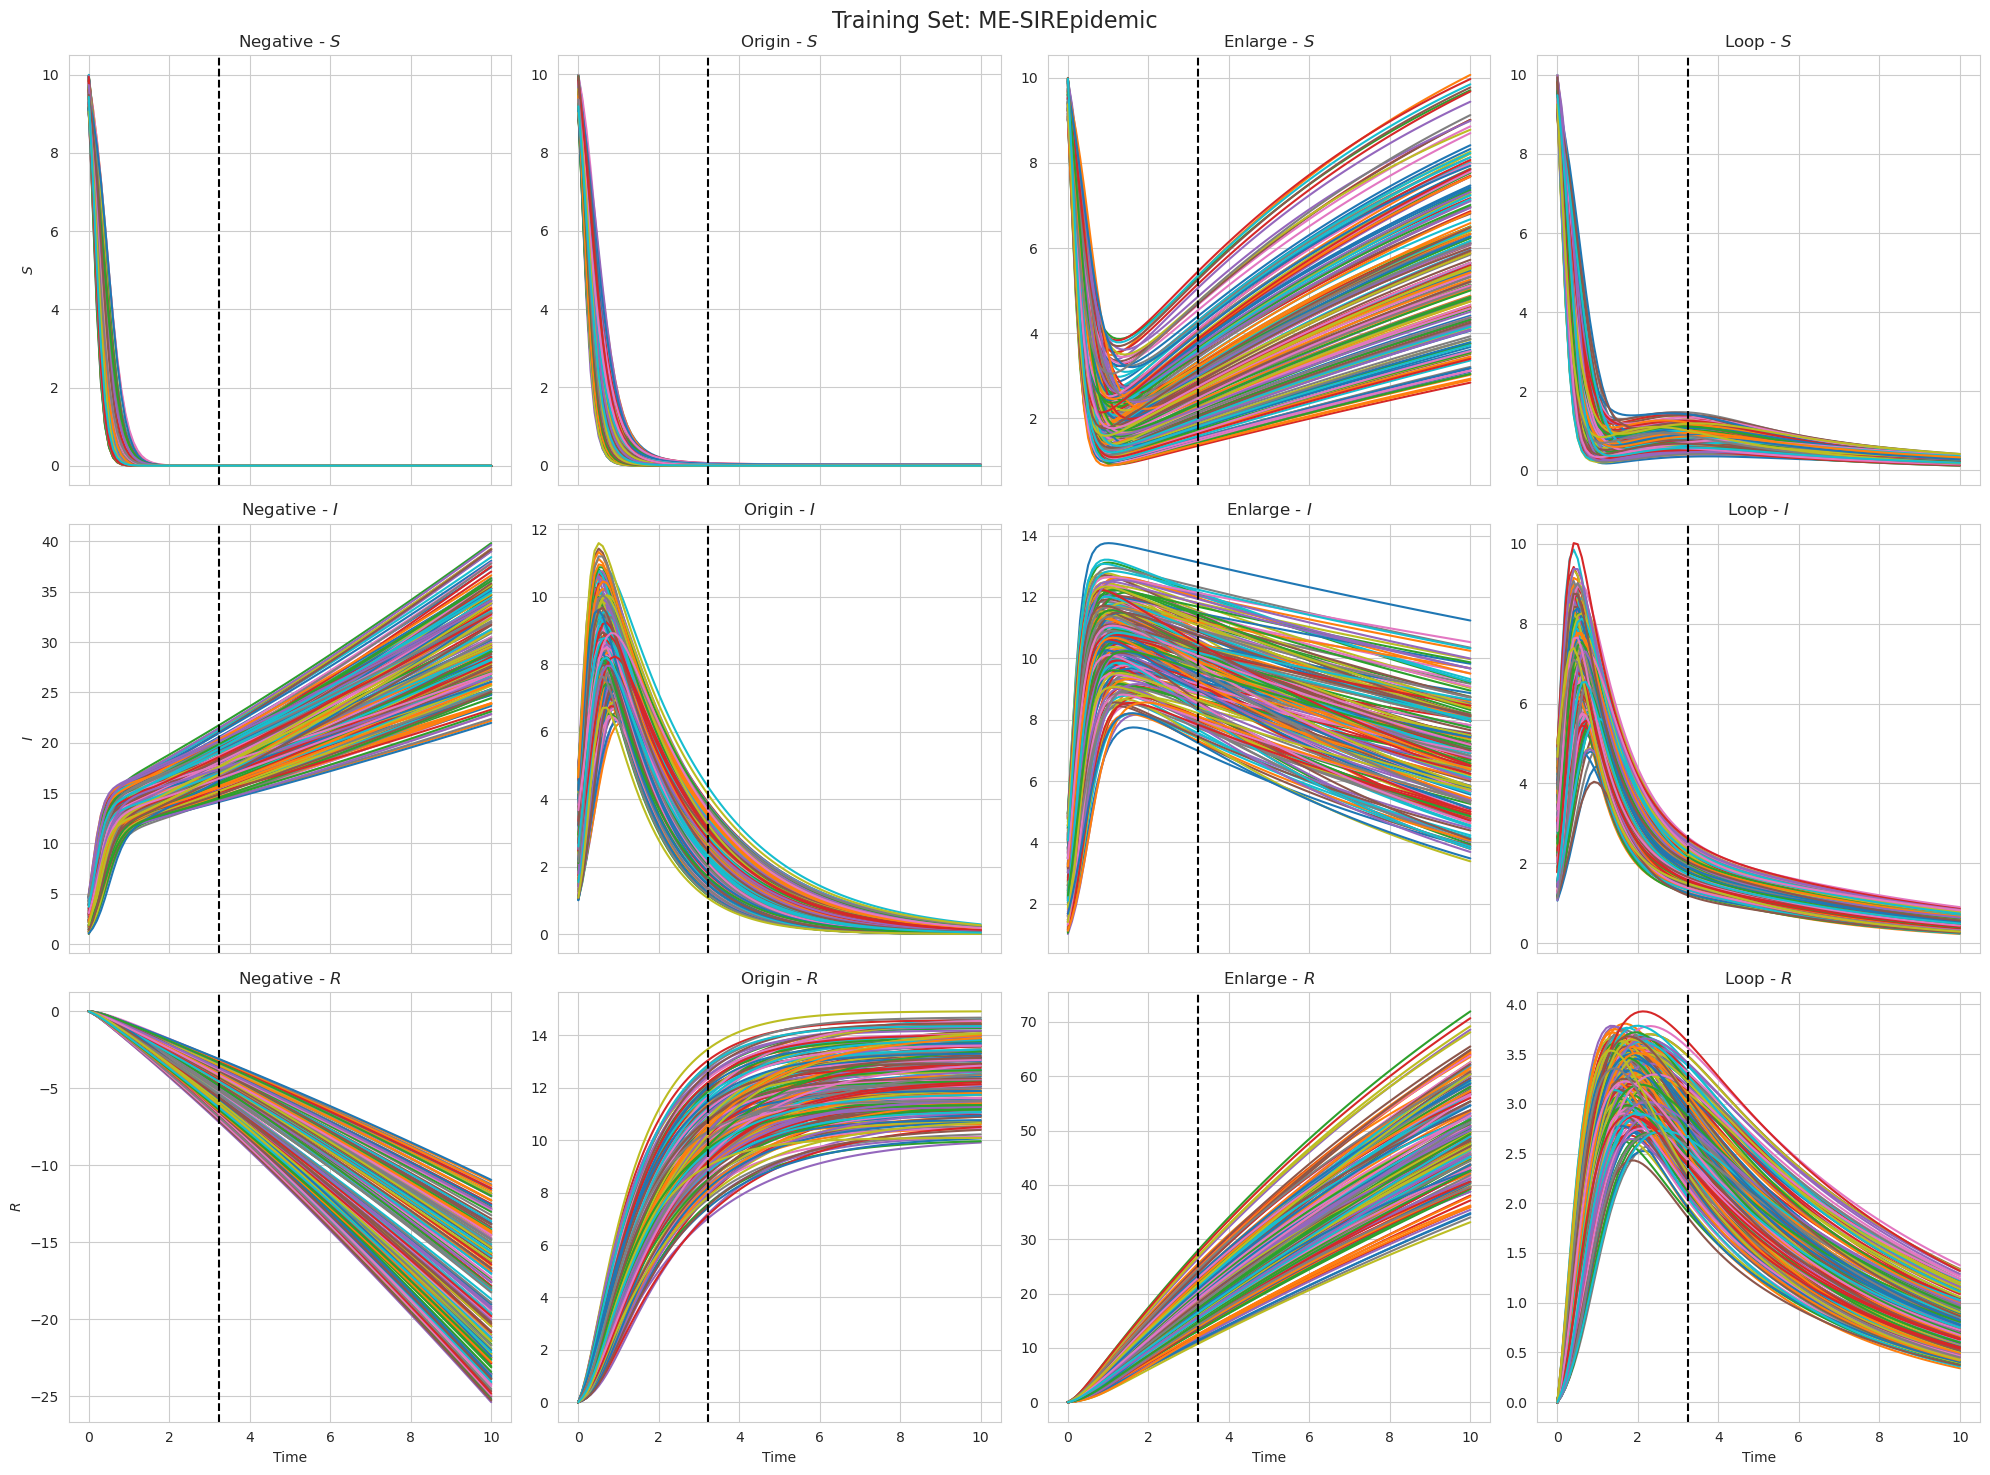

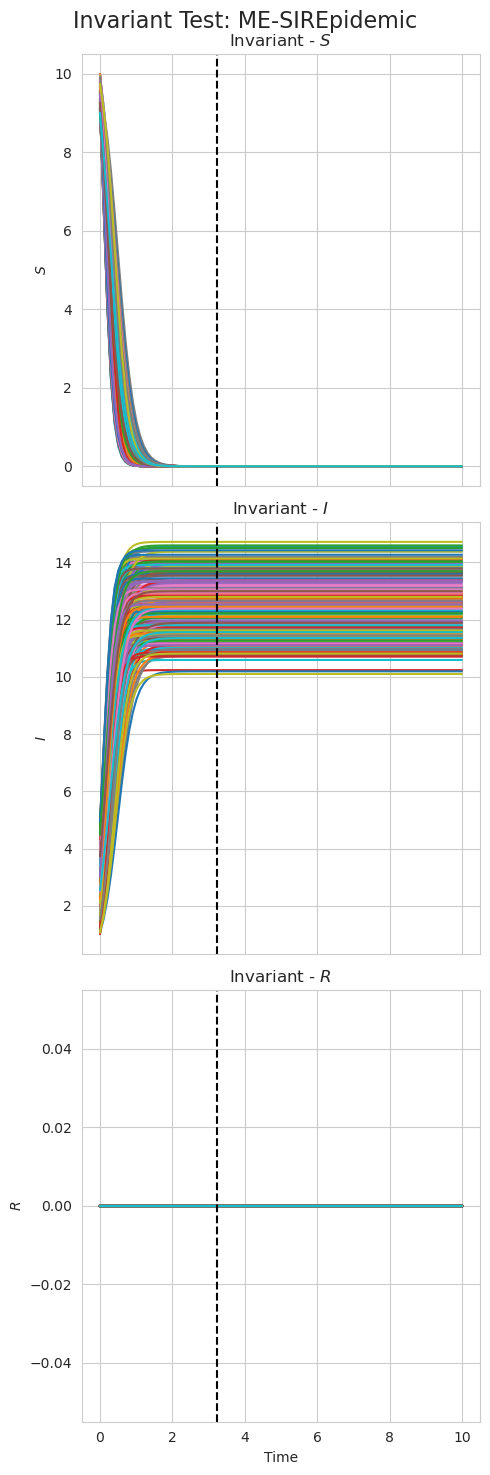

In [2]:
import shlex
setting_dict = {'ME-Pendulum': {'args_str': '--config configs/json_config/DampedPendulum/InvariantFuncEncMI.yaml', 
                             'exp_hash': '3ecb1a4a062ee63083057a72d667e8993800a9e5'},
                'ME-Lotka-Volterra': {'args_str': '--config configs/json_config/LotkaVolterra2/InvariantFuncEncMI.yaml',
                                   'exp_hash': "1b54e63279d37846026a52b63cd6a17564e7bdbe"},
                'ME-SIREpidemic': {'args_str': '--config configs/json_config/SIREpidemic/InvariantFuncEncMI.yaml',
                                'exp_hash': "6843e569ed9ee40647f117006c30a741fc7b3021"}}
# args_str = '--config configs/json_config/DampedPendulum/InvariantFuncEncMI.yaml'
# exp_hash = "3ecb1a4a062ee63083057a72d667e8993800a9e5"

for dataset_name in setting_dict.keys():
    args_str = setting_dict[dataset_name]['args_str']
    exp_hash = setting_dict[dataset_name]['exp_hash']
    
    pre_parser = origArgumentParser()
    pre_parser.add_argument('--config', type=pathlib.Path, help='Config file')
    pre_cfg, unk = pre_parser.parse_known_args(shlex.split(args_str))
    real_path = ROOT_DIR / pre_cfg.config
    simple_config = yaml.load(real_path.read_text(), Loader=yaml.FullLoader)
    experiment_name = simple_config['exp']['class_path']
    
    # --- main parser ---
    parser = ArgumentParser(parser_mode='omegaconf')
    # -- A wrapper for the experiment class: No nested key --
    parser.add_class_arguments(CEL, sub_configs=True)
    # parser.add_subclass_arguments(ExpClass, 'exp')
    if 'aphynity' in experiment_name.lower():
        parser.link_arguments('exp.dataloader.dataset', 'exp.init_args.net.init_args.dataset', apply_on='instantiate')
    # parser.link_arguments('exp.loader["train"].dataset.input_length', 'exp.init_args.model.init_args.input_length', apply_on='instantiate')
    parser.add_argument('--post_config', action=ActionConfigFile, help='Config file')
    
    
    
    checkpoint_path = pathlib.Path(os.environ['STORAGE_DIR']) / 'exp' / exp_hash
    config_file = checkpoint_path / 'config.yml'
    cfg = parser.parse_args(['--post_config', str(config_file)] + unk)
    dict_cfg = cfg.as_dict()
    orig_dataset_root = pathlib.Path(cfg.exp.init_args.dataloader.init_args.dataset.init_args.root)
    rel_dataset_root = pathlib.Path(*orig_dataset_root.parts[-2:])
    new_dataset_root = pathlib.Path(os.environ['STORAGE_DIR']) / rel_dataset_root
    cfg.exp.init_args.dataloader.init_args.dataset.init_args.root = str(new_dataset_root)
    cfg = parser.instantiate_classes(cfg)
    
    print(cfg.exp.model.hyper_network.num_param_main_func)
    
    if dataset_name == 'ME-Pendulum':
        train_set = cfg.exp.loader['train'].dataset
        train_set.multi_env_plot(train_set.y, ['Powered', 'Air', 'Spring', 'Damped'], ['$\\theta$', '$\\omega$'], title=f"Training Set: {dataset_name}")
        test_set = cfg.exp.loader['ood_test'].dataset
        test_set.multi_env_plot(test_set.y, ['Invariant'], ['$\\theta$', '$\\omega$'], title=f"Invariant Test: {dataset_name}")
    elif dataset_name == 'ME-Lotka-Volterra':
        train_set = cfg.exp.loader['train'].dataset
        train_set.multi_env_plot(train_set.y, ['Save', 'Fight', 'Resource', 'Omnivore'], ['$p$', '$q$'], title=f"Training Set: {dataset_name}")
        test_set = cfg.exp.loader['ood_test'].dataset
        test_set.multi_env_plot(test_set.y, ['Invariant'], ['$p$', '$q$'], title=f"Invariant Test: {dataset_name}")
    elif dataset_name == 'ME-SIREpidemic':
        train_set = cfg.exp.loader['train'].dataset
        train_set.multi_env_plot(train_set.y, ['Negative', 'Origin', 'Enlarge', 'Loop'], ['$S$', '$I$', '$R$'], title=f"Training Set: {dataset_name}")
        test_set = cfg.exp.loader['ood_test'].dataset
        test_set.multi_env_plot(test_set.y, ['Invariant'], ['$S$', '$I$', '$R$'], title=f"Invariant Test: {dataset_name}")


In [5]:
cfg.exp.model.hyper_network.num_param_main_func

915

IndexError: list index out of range

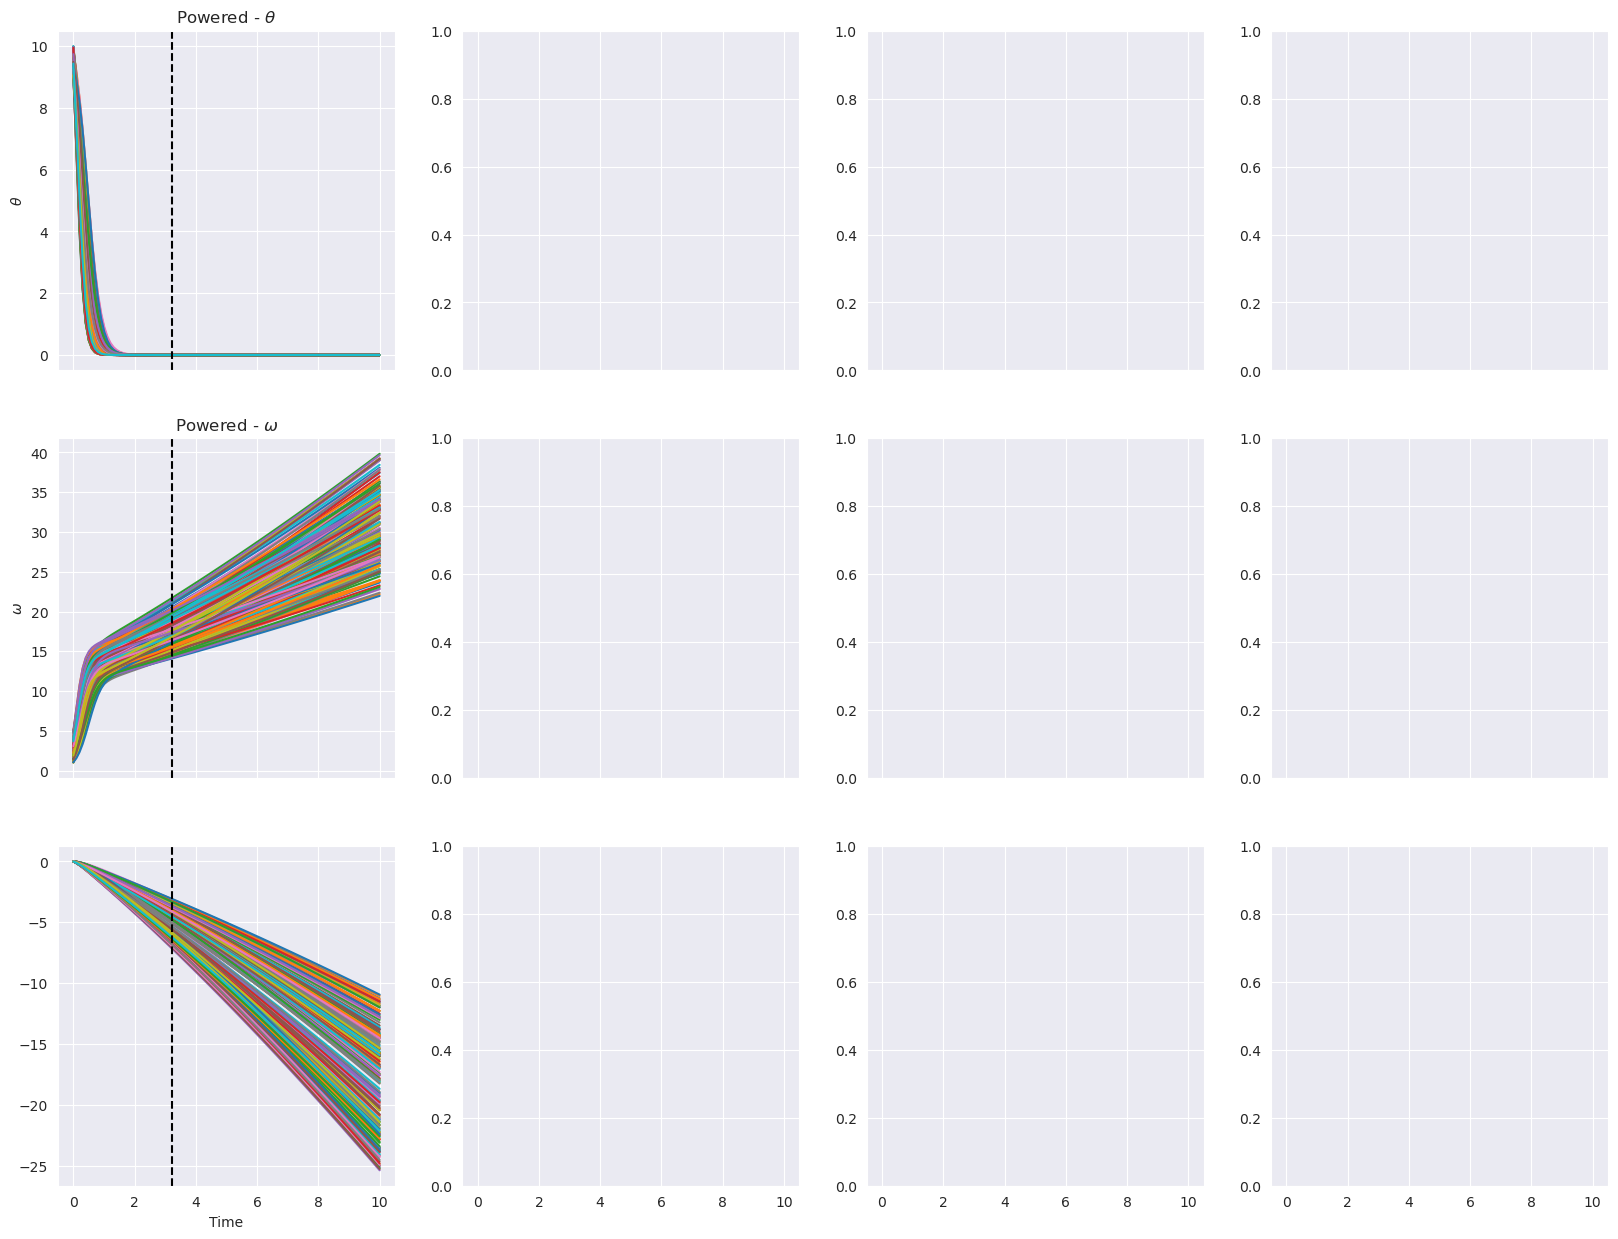

In [25]:
import shlex
setting_dict = {'ME-Pendulum': {'args_str': '--config configs/json_config/DampedPendulum/InvariantFuncEncMI.yaml', 
                             'exp_hash': '3ecb1a4a062ee63083057a72d667e8993800a9e5'},
                'ME-Lotka-Volterra': {'args_str': '--config configs/json_config/LotkaVolterra/InvariantFuncEncMI.yaml',
                                   'exp_hash': '27cb8ca0634747d480f579db954f8ae4918f6981'},
                'ME-SIREpidemic': {'args_str': '--config configs/json_config/SIREpidemic/InvariantFuncEncMI.yaml',
                                'exp_hash': "6843e569ed9ee40647f117006c30a741fc7b3021"}}
# args_str = '--config configs/json_config/DampedPendulum/InvariantFuncEncMI.yaml'
# exp_hash = "3ecb1a4a062ee63083057a72d667e8993800a9e5"
dataset_name = 'ME-Lotka-Volterra'
args_str = setting_dict[dataset_name]['args_str']
exp_hash = setting_dict[dataset_name]['exp_hash']

pre_parser = origArgumentParser()
pre_parser.add_argument('--config', type=pathlib.Path, help='Config file')
pre_cfg, unk = pre_parser.parse_known_args(shlex.split(args_str))
real_path = ROOT_DIR / pre_cfg.config
simple_config = yaml.load(real_path.read_text(), Loader=yaml.FullLoader)
experiment_name = simple_config['exp']['class_path']

# --- main parser ---
parser = ArgumentParser(parser_mode='omegaconf')
# -- A wrapper for the experiment class: No nested key --
parser.add_class_arguments(CEL, sub_configs=True)
# parser.add_subclass_arguments(ExpClass, 'exp')
if 'aphynity' in experiment_name.lower():
    parser.link_arguments('exp.dataloader.dataset', 'exp.init_args.net.init_args.dataset', apply_on='instantiate')
# parser.link_arguments('exp.loader["train"].dataset.input_length', 'exp.init_args.model.init_args.input_length', apply_on='instantiate')
parser.add_argument('--post_config', action=ActionConfigFile, help='Config file')



checkpoint_path = pathlib.Path(os.environ['STORAGE_DIR']) / 'exp' / exp_hash
config_file = checkpoint_path / 'config.yml'
cfg = parser.parse_args(['--post_config', str(config_file)] + unk)
dict_cfg = cfg.as_dict()
orig_dataset_root = pathlib.Path(cfg.exp.init_args.dataloader.init_args.dataset.init_args.root)
rel_dataset_root = pathlib.Path(*orig_dataset_root.parts[-2:])
new_dataset_root = pathlib.Path(os.environ['STORAGE_DIR']) / rel_dataset_root
cfg.exp.init_args.dataloader.init_args.dataset.init_args.root = str(new_dataset_root)
cfg = parser.instantiate_classes(cfg)

train_set = cfg.exp.loader['train'].dataset
train_set.multi_env_plot(train_set.y, ['Powered', 'Air', 'Spring', 'Damped'], ['$\\theta$', '$\\omega$'], title=f"Training Set: {dataset_name}")
test_set = cfg.exp.loader['ood_test'].dataset
test_set.multi_env_plot(test_set.y, ['Invariant'], ['$\\theta$', '$\\omega$'], title=f"Invariant Test: {dataset_name}")
